# **Loading (Libraries, CSV)**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#curve fit
from scipy.optimize import curve_fit

# design plots
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file = files.upload()

Saving mee_covid.csv to mee_covid.csv


In [3]:
df = pd.read_csv('mee_covid.csv')
df.drop(columns=['Province/State','Lat','Long','Deaths','Recovered'],inplace=True)
df.rename(columns={'Country/Region':'Country'},inplace=True)
df

,Country,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
26395,Western Sahara,4/30/20,6
26396,Sao Tome and Principe,4/30/20,14
26397,Yemen,4/30/20,6
26398,Comoros,4/30/20,1


# **Brazil Dataset**

In [4]:
brazil = df.loc[df['Country'] == 'Brazil'] #defining ds to Brazil
brazil.sort_values(by=['Confirmed','Date'],ascending=True,inplace=True) #ordering
brazil = brazil[df['Confirmed'] >= 150].iloc[:39]
brazil.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Date,Confirmed
13492,Brazil,3/13/20,151
13756,Brazil,3/14/20,151
14020,Brazil,3/15/20,162
14284,Brazil,3/16/20,200
14548,Brazil,3/17/20,321


# **Argentina Dataset**

In [5]:
argentina = df.loc[df['Country'] == 'Argentina'] #defining ds to Argentina
argentina.sort_values(by=['Confirmed','Date'],ascending=True,inplace=True) #ordering
argentina = argentina[df['Confirmed'] >= 150].iloc[:39]
argentina.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Date,Confirmed
15582,Argentina,3/21/20,158
15846,Argentina,3/22/20,266
16110,Argentina,3/23/20,301
16374,Argentina,3/24/20,387
16638,Argentina,3/25/20,387


# **Data Analysis**

In [6]:
'''

*** Definições ***

— Ambos os datasets possuem len(39), ou seja: a análise dos dados condenada ao redimensinamento dos dados (85% do dataset treino e 15% teste) vai ser feito de acordo com esse número
logo: 
training_size = 0.80 * 39 approx -> 33 linhas de treino
test_size = 39 - treino approx -> 7 linhas de teste

'''

'\n\n*** Definições ***\n\n— Ambos os datasets possuem len(39), ou seja: a análise dos dados condenada ao redimensinamento dos dados (85% do dataset treino e 15% teste) vai ser feito de acordo com esse número\nlogo: \ntraining_size = 0.80 * 39 approx -> 33 linhas de treino\ntest_size = 39 - treino approx -> 7 linhas de teste\n\n'

In [7]:
len(argentina['Confirmed'])

39

In [0]:
t_list = []
for i in range(0,39):
  t_list.append(i)
brazil['t'] = t_list
argentina['t'] = t_list


In [0]:
brazil_training = brazil.iloc[:33]
argentina_training = argentina.iloc[:33]

# **Definitions**

*   Definição das funções de predição

In [0]:
def br_malthus(a,t):
  return 151*np.exp(a*t) #151 is a pre-definied constant value on br
  
def ar_malthus(a,t):
  return 158*np.exp(a*t)

def br_ver(a,t,L):
  return (L*151)/((L-151)*np.exp(-1*a*t)+151)

def ar_ver(a,t,L):
  return (L*158)/((L-158)*np.exp(-1*a*t)+158)

# **Analysis on Brazil**

In [11]:
# Malthus (BR)

br_malthus_popt, br_malthus_pcov = curve_fit(br_malthus,brazil_training['t'],brazil_training['Confirmed'])# calculating coefficient a
br_malthus_a = br_malthus_popt
br_malthus_deva = np.sqrt(np.diag(br_malthus_pcov))
print("a = %6.2f +- %.4f" %(br_malthus_a, br_malthus_deva))

a =   0.17 +- 0.0016


In [12]:
# Verhulst (BR)

br_ver_popt, br_ver_pcov = curve_fit(br_ver,brazil['t'],brazil['Confirmed']) # calculating coefficients a,L (0.85 of data wasnt enough)
br_ver_a, br_ver_L = br_ver_popt
br_ver_deva, br_ver_devL = np.sqrt(np.diag(br_ver_pcov))
print("a = %6.2f +- %6.4f\nL = %6.2f +- %6.2f"%(br_ver_a,br_ver_deva,br_ver_L,br_ver_devL))

a =   0.19 +- 0.0020
L = 46291.20 +- 1562.14


In [13]:
brazil_training['Malthus'] = br_malthus(br_malthus_a,brazil_training['t']).round() # creating column Malthus
brazil_training['Verhulst'] = br_ver(br_ver_a,brazil_training['t'],br_ver_L,).round() # creating column Verhulst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
brazil_training.head() # overview on new dataset

,Country,Date,Confirmed,t,Malthus,Verhulst
13492,Brazil,3/13/20,151,0,151.0,151.0
13756,Brazil,3/14/20,151,1,178.0,183.0
14020,Brazil,3/15/20,162,2,211.0,221.0
14284,Brazil,3/16/20,200,3,249.0,268.0
14548,Brazil,3/17/20,321,4,295.0,325.0


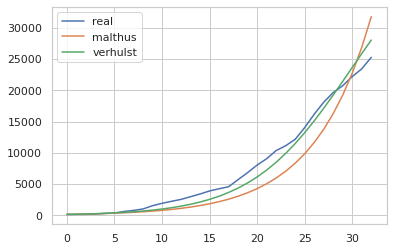

In [15]:
# Plot

plt.plot(brazil_training['t'],brazil_training['Confirmed'],label='real')
plt.plot(brazil_training['t'],brazil_training['Malthus'],label='malthus')
plt.plot(brazil_training['t'],brazil_training['Verhulst'],label='verhulst')
plt.legend()
plt.show()

# **Analysis on Argentina**

In [16]:
# Malthus (AR)

ar_malthus_popt, ar_malthus_pcov = curve_fit(ar_malthus,argentina_training['t'],argentina_training['Confirmed'])# calculating coefficient a
ar_malthus_a = ar_malthus_popt
ar_malthus_deva = np.sqrt(np.diag(ar_malthus_pcov))
print("a = %6.2f +- %.4f" %(ar_malthus_a, ar_malthus_deva))

a =   0.10 +- 0.0020


In [17]:
# Verhulst (BR)

ar_ver_popt, ar_ver_pcov = curve_fit(ar_ver,argentina_training['t'],argentina_training['Confirmed']) # calculating coefficients a,L (0.85 of data wasnt enough)
ar_ver_a, ar_ver_L = ar_ver_popt
ar_ver_deva, ar_ver_devL = np.sqrt(np.diag(ar_ver_pcov))
print("a = %6.7f +- %6.4f\nL = %6.2f +- %6.2f"%(ar_ver_a,ar_ver_deva,ar_ver_L,ar_ver_devL))

a = -0.0000026 +- 0.0013
L =   0.01 +-   6.71


In [18]:
argentina_training['Malthus'] = ar_malthus(ar_malthus_a,argentina_training['t']).round() # creating column Malthus
argentina_training['Verhulst'] = ar_ver(ar_ver_a,argentina_training['t'],ar_ver_L,).round() # creating column Verhulst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


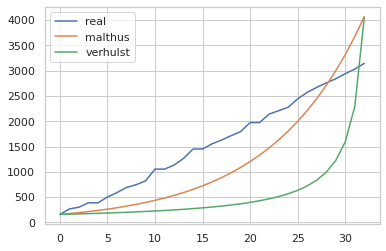

In [19]:
# Plot

plt.plot(argentina_training['t'],argentina_training['Confirmed'],label='real')
plt.plot(argentina_training['t'],argentina_training['Malthus'],label='malthus')
plt.plot(argentina_training['t'],argentina_training['Verhulst'],label='verhulst')
plt.legend()
plt.show()

In [20]:
argentina_training[33:38]

,Country,Date,Confirmed,t,Malthus,Verhulst


# **Integrated Analysis**

In [0]:
def br_erro_malthus(t,infec_modelo):
  return t*infec_modelo*br_malthus_deva

def ar_erro_malthus(t,infec_modelo):
  return t*infec_modelo*ar_malthus_deva

def erro_e(infec_real,infec_modelo):
  return 100*(np.absolute(infec_real - infec_modelo)/(infec_real))

def br_z_score(infec_real,infec_modelo,erro_malthus):
    return np.divide(np.absolute(infec_real - infec_modelo),erro_malthus)

def ar_z_score(infec_real,infec_modelo,erro_malthus):
    return np.divide(np.absolute(infec_real - infec_modelo),erro_malthus)

In [22]:
# Brazil Metrics (Uxinfec, Estimated Error, Z-Score)

brazil_training['Uxinfec'] = br_erro_malthus(brazil_training['t'],brazil_training['Malthus']).round(2)
brazil_training['erro estimado (%)'] = (100*(np.absolute(brazil_training['Confirmed'] - brazil_training['Malthus']))/brazil_training['Confirmed']).round(2)
brazil_training['Z-Score'] = br_z_score(brazil_training['Confirmed'],brazil_training['Malthus'],brazil_training['erro estimado (%)']).round(2)

# Argentina Metrics (Uxinfec, Estimated Error, Z-Score)

argentina_training['Uxinfec'] = br_erro_malthus(argentina_training['t'],argentina_training['Malthus']).round(2)
argentina_training['erro estimado (%)'] = (100*(np.absolute(argentina_training['Confirmed'] - argentina_training['Malthus']))/argentina_training['Confirmed']).round(2)
argentina_training['Z-Score'] = br_z_score(argentina_training['Confirmed'],argentina_training['Malthus'],argentina_training['erro estimado (%)']).round(2)

# Correction on division by zero

argentina_training['Z-Score'].iloc[:1] = 0
brazil_training['Z-Score'].iloc[:1] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [0]:
brazil_training = brazil_training[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]
argentina_training = argentina_training[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]

In [24]:
brazil_training.head(20)

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
13492,Brazil,3/13/20,0,151,151.0,0.00,0.00,151.0
13756,Brazil,3/14/20,1,151,178.0,17.88,1.51,183.0
14020,Brazil,3/15/20,2,162,211.0,30.25,1.62,221.0
14284,Brazil,3/16/20,3,200,249.0,24.50,2.00,268.0
14548,Brazil,3/17/20,4,321,295.0,8.10,3.21,325.0
14812,Brazil,3/18/20,5,372,348.0,6.45,3.72,393.0
15076,Brazil,3/19/20,6,621,412.0,33.66,6.21,475.0
15340,Brazil,3/20/20,7,793,487.0,38.59,7.93,574.0
15604,Brazil,3/21/20,8,1021,575.0,43.68,10.21,694.0
15868,Brazil,3/22/20,9,1546,680.0,56.02,15.46,839.0


In [25]:
argentina_training.head(20)

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
15582,Argentina,3/21/20,0,158,158.0,0.00,0.00,158.0
15846,Argentina,3/22/20,1,266,175.0,34.21,2.66,163.0
16110,Argentina,3/23/20,2,301,194.0,35.55,3.01,168.0
16374,Argentina,3/24/20,3,387,214.0,44.70,3.87,174.0
16638,Argentina,3/25/20,4,387,237.0,38.76,3.87,180.0
16902,Argentina,3/26/20,5,502,262.0,47.81,5.02,186.0
17166,Argentina,3/27/20,6,589,290.0,50.76,5.89,193.0
17430,Argentina,3/28/20,7,690,322.0,53.33,6.90,200.0
17694,Argentina,3/29/20,8,745,356.0,52.21,7.45,208.0
17958,Argentina,3/30/20,9,820,394.0,51.95,8.20,217.0


# **Training x Test App.**

In [26]:
len(brazil)

39

In [27]:
len(argentina)

39

In [28]:
brazil[:33] 

,Country,Date,Confirmed,t
13492,Brazil,3/13/20,151,0
13756,Brazil,3/14/20,151,1
14020,Brazil,3/15/20,162,2
14284,Brazil,3/16/20,200,3
14548,Brazil,3/17/20,321,4
14812,Brazil,3/18/20,372,5
15076,Brazil,3/19/20,621,6
15340,Brazil,3/20/20,793,7
15604,Brazil,3/21/20,1021,8
15868,Brazil,3/22/20,1546,9


# **Completing Dataset for Brazil**

In [0]:
brazil['Malthus'] = 0
brazil['Verhulst'] = 0
brazil['Uxinfec'] = 0
brazil['erro estimado (%)'] = 0
brazil['Z-Score'] = 0

In [30]:
brazil['Malthus'].iloc[33:39] = br_malthus(br_malthus_a,brazil['t']).round() # creating column Malthus
brazil['Verhulst'].iloc[33:39] = br_ver(br_ver_a,brazil['t'],br_ver_L,).round() # creating column Verhulst
brazil['Uxinfec'].iloc[33:39] = br_erro_malthus(brazil['t'],brazil['Malthus']).round(2)
brazil['erro estimado (%)'].iloc[33:39] = (100*(np.absolute(brazil['Confirmed'] - brazil['Malthus']))/brazil['Confirmed']).round(2)
brazil['Z-Score'].iloc[33:39] = br_z_score(brazil['Confirmed'],brazil['Malthus'],brazil['erro estimado (%)']).round(2)

brazil['Malthus'].iloc[0:33] = br_malthus(br_malthus_a,brazil_training['t']).round() # creating column Malthus
brazil['Verhulst'].iloc[0:33] = br_ver(br_ver_a,brazil_training['t'],br_ver_L,).round() # creating column Verhulst
brazil['Uxinfec'].iloc[0:33] = br_erro_malthus(brazil_training['t'],brazil_training['Malthus']).round(2)
brazil['erro estimado (%)'].iloc[0:33] = (100*(np.absolute(brazil_training['Confirmed'] - brazil_training['Malthus']))/brazil_training['Confirmed']).round(2)
brazil['Z-Score'].iloc[0:33] = br_z_score(brazil_training['Confirmed'],brazil_training['Malthus'],brazil_training['erro estimado (%)']).round(2)

brazil['Z-Score'].iloc[:1] = 0

brazil = brazil[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
brazil

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
13492,Brazil,3/13/20,0,151,151.0,0.00,0.00,151.0
13756,Brazil,3/14/20,1,151,178.0,17.88,1.51,183.0
14020,Brazil,3/15/20,2,162,211.0,30.25,1.62,221.0
14284,Brazil,3/16/20,3,200,249.0,24.50,2.00,268.0
14548,Brazil,3/17/20,4,321,295.0,8.10,3.21,325.0
14812,Brazil,3/18/20,5,372,348.0,6.45,3.72,393.0
15076,Brazil,3/19/20,6,621,412.0,33.66,6.21,475.0
15340,Brazil,3/20/20,7,793,487.0,38.59,7.93,574.0
15604,Brazil,3/21/20,8,1021,575.0,43.68,10.21,694.0
15868,Brazil,3/22/20,9,1546,680.0,56.02,15.46,839.0


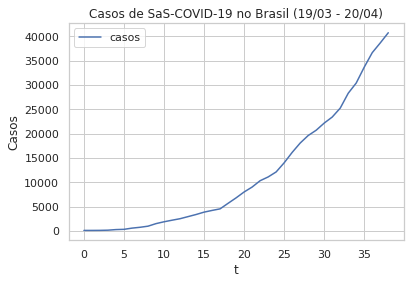

In [32]:
plt.plot(brazil['t'],brazil['Confirmed'],label='casos')
plt.legend()
plt.title('Casos de SaS-COVID-19 no Brasil (19/03 - 20/04)')
plt.ylabel('Casos')
plt.xlabel('t')
plt.show()

# **Completing Dataset for Argentina**

In [0]:
argentina['Malthus'] = 0
argentina['Verhulst'] = 0
argentina['Uxinfec'] = 0
argentina['erro estimado (%)'] = 0
argentina['Z-Score'] = 0

In [34]:
argentina['Malthus'].iloc[0:33] = ar_malthus(ar_malthus_a,argentina_training['t']).round() # creating column Malthus
argentina['Verhulst'].iloc[0:33] = ar_ver(ar_ver_a,argentina_training['t'],ar_ver_L,).round() # creating column Verhulst
argentina['Uxinfec'].iloc[0:33] = br_erro_malthus(argentina_training['t'],argentina_training['Malthus']).round(2)
argentina['erro estimado (%)'].iloc[0:33] = (100*(np.absolute(argentina_training['Confirmed'] - argentina_training['Malthus']))/argentina_training['Confirmed']).round(2)
argentina['Z-Score'].iloc[0:33] = br_z_score(argentina_training['Confirmed'],argentina_training['Malthus'],argentina_training['erro estimado (%)']).round(2)

argentina['Malthus'].iloc[33:39] = ar_malthus(ar_malthus_a,argentina['t']).round() # creating column Malthus
argentina['Verhulst'].iloc[33:39] = ar_ver(ar_ver_a,argentina['t'],ar_ver_L,).round() # creating column Verhulst
argentina['Uxinfec'].iloc[33:39] = br_erro_malthus(argentina['t'],argentina['Malthus']).round(2)
argentina['erro estimado (%)'].iloc[33:39] = (100*(np.absolute(argentina['Confirmed'] - argentina['Malthus']))/argentina['Confirmed']).round(2)
argentina['Z-Score'].iloc[33:39] = br_z_score(argentina['Confirmed'],argentina['Malthus'],argentina['erro estimado (%)']).round(2)

argentina['Z-Score'].iloc[:1] = 0

argentina = argentina[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
argentina

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
15582,Argentina,3/21/20,0,158,158.0,0.00,0.00,158.0
15846,Argentina,3/22/20,1,266,175.0,34.21,2.66,163.0
16110,Argentina,3/23/20,2,301,194.0,35.55,3.01,168.0
16374,Argentina,3/24/20,3,387,214.0,44.70,3.87,174.0
16638,Argentina,3/25/20,4,387,237.0,38.76,3.87,180.0
16902,Argentina,3/26/20,5,502,262.0,47.81,5.02,186.0
17166,Argentina,3/27/20,6,589,290.0,50.76,5.89,193.0
17430,Argentina,3/28/20,7,690,322.0,53.33,6.90,200.0
17694,Argentina,3/29/20,8,745,356.0,52.21,7.45,208.0
17958,Argentina,3/30/20,9,820,394.0,51.95,8.20,217.0


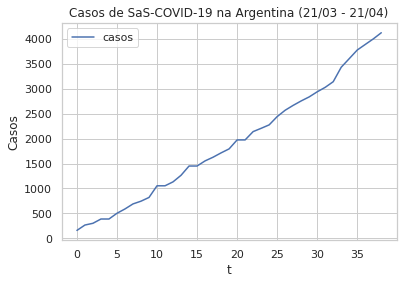

In [36]:
plt.plot(argentina['t'],argentina['Confirmed'],label='casos')
plt.legend()
plt.ylabel('Casos')
plt.xlabel('t')
plt.title('Casos de SaS-COVID-19 na Argentina (21/03 - 21/04)')
plt.show()

In [37]:
len(argentina['Verhulst'])

39

In [0]:
brazil.to_csv('brazil_dataframe.csv')

In [0]:
argentina.to_csv('argentina_dataframe.csv')